In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
comments=pd.read_csv("UScomments.csv",error_bad_lines=False)

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'


In [3]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [4]:
comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [5]:
comments=comments.dropna()

In [6]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

### Sentiment Analysis

In [7]:
!pip install textblob

In [8]:
from textblob import TextBlob

In [9]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

0.0

In [10]:
polarity=[]
for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
         polarity.append(0)
            

In [11]:
len(polarity)

691375

In [12]:
comments['Polarity']=polarity

In [13]:
comments.head()

,video_id,comment_text,likes,replies,Polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


### Word cloud analysis

In [14]:
comments_positive=comments[comments['Polarity']==1]

In [15]:
comments_positive

,video_id,comment_text,likes,replies,Polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
...,...,...,...,...,...
691373,EoejGgUNmVU,Perfect. Every version,0,0,1.0
691383,EoejGgUNmVU,Me encantaaaaa <3,0,0,1.0
691388,EoejGgUNmVU,Best song ever 🤘,0,0,1.0
691389,EoejGgUNmVU,excellent performance,0,0,1.0


In [16]:
comments_negative=comments[comments['Polarity']==-1]
comments_negative

,video_id,comment_text,likes,replies,Polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0
...,...,...,...,...,...
690788,Hlt3rA-oDao,Like Kelly she evil,0,0,-1.0
690865,Ni5Uc-DdMqk,R U FUCKING KIDDING ME?!?!?!?!,11,1,-1.0
691073,4kmSATD25iY,This is horribly offensive please report,0,0,-1.0
691180,xlu6i6lT_vk,Sink holes looks terrifying sinkholes sink you...,0,0,-1.0


In [17]:
from wordcloud import WordCloud,STOPWORDS

In [18]:
worldcloud1=WordCloud(stopwords=set(STOPWORDS)).generate(" ".join(comments_positive['comment_text']))

(-0.5, 399.5, 199.5, -0.5)

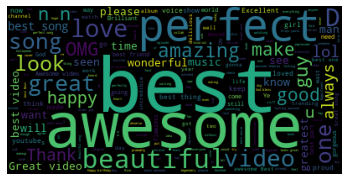

In [19]:
plt.imshow(worldcloud1)
plt.axis('off')

Observation:
   - Most positive reviews are best,awesome,perfect,beautiful

In [20]:
worldcloud2=WordCloud(stopwords=set(STOPWORDS)).generate(" ".join(comments_negative['comment_text']))

(-0.5, 399.5, 199.5, -0.5)

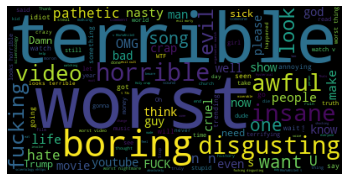

In [21]:
plt.imshow(worldcloud2)
plt.axis('off')

Observation:
    - Most negative reviews are worst,terriable

#### Emoji's Analysis

In [22]:
!pip install emoji==2.2.0

In [23]:
import emoji

In [24]:
emoji.__version__

'2.2.0'

In [25]:
total_emojis_list=[char for comment in comments['comment_text'].dropna() for char in comment if char in emoji.EMOJI_DATA]

In [26]:
total_emojis_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [27]:
from collections import Counter

In [28]:
Counter(total_emojis_list).most_common(20) 

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147),
 ('♥', 4909),
 ('😊', 3596),
 ('🏻', 3438),
 ('💜', 3429),
 ('😬', 3381),
 ('👌', 3112),
 ('💙', 2831),
 ('😢', 2672),
 ('🏼', 2549),
 ('🤣', 2279)]

In [29]:
emojis=[Counter(total_emojis_list).most_common(20)[i][0] for i in range(20)]
emojis

['😂',
 '😍',
 '❤',
 '🔥',
 '😭',
 '👏',
 '😘',
 '👍',
 '💖',
 '💕',
 '♥',
 '😊',
 '🏻',
 '💜',
 '😬',
 '👌',
 '💙',
 '😢',
 '🏼',
 '🤣']

In [30]:
emoji_cnt=[Counter(total_emojis_list).most_common(20)[i][1] for i in range(20)]
emoji_cnt

[36987,
 33453,
 31119,
 8694,
 8398,
 5719,
 5545,
 5476,
 5359,
 5147,
 4909,
 3596,
 3438,
 3429,
 3381,
 3112,
 2831,
 2672,
 2549,
 2279]

<AxesSubplot:>

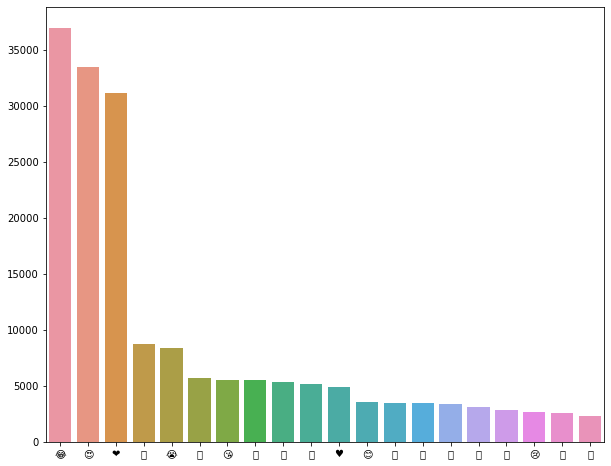

In [31]:
plt.figure(figsize=(10,8))
sns.barplot(emojis,emoji_cnt)

In [32]:
import os

In [33]:
path=r'C:/Users/dhana/Downloads/Dhana_Data_Science/Projects/EDA/Youtube_Data _Analysis/additional_data'
files_csv=[file for file in os.listdir(path) if '.csv' in file]
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv',
 'youtube_data.csv']

In [34]:
full_df=pd.DataFrame()
for file in files_csv:
    current_df=pd.read_csv(path+'/'+file,encoding='iso-8859-1',error_bad_lines=False)
    full_df=pd.concat([full_df,current_df],ignore_index=True)
full_df.head()    

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


In [35]:
full_df.shape

(1930818, 16)

In [39]:
df=full_df[0:20000]

In [44]:
#remove duplicates
df.duplicated().sum()

0

In [45]:
df.shape

(20000, 16)

##### storing data into csv

In [46]:
df.to_csv(r'C:/Users/dhana/Downloads/Dhana_Data_Science/Projects/EDA/Youtube_Data _Analysis/additional_data/youtube_data.csv',index=False)

### EXploratory Data Analysis

### which category has the maximum likes?

In [47]:
df_json=pd.read_json(r"C:\Users\dhana\Downloads\Dhana_Data_Science\Projects\EDA\Youtube_Data _Analysis\additional_data\US_category_id.json")

In [48]:
df_json.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [49]:
df_json['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [50]:
category_dict={}
for item in df_json['items']:
    category_dict[int(item['id'])]=item['snippet']['title']
category_dict    

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [53]:
df['category_name']=df['category_id'].map(category_dict)

In [54]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music


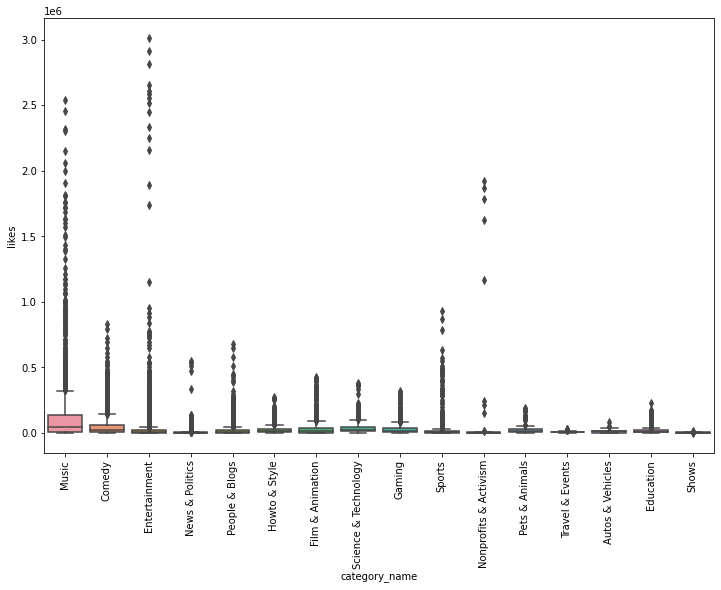

In [55]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name',y='likes',data=df)
plt.xticks(rotation=90)
plt.show()

#### Find out whether audience is enggaged or not

In [56]:
df['like_rate']=(df['likes']/df['views'])*100
df['dislike_rate']=(df['dislikes']/df['views'])*100
df['comment_count_rate']=(df['comment_count']/df['views'])*100

In [57]:
df['like_rate']

0         4.589104
1        12.594873
2         4.575843
3         6.309630
4         4.874563
           ...    
19995     0.552946
19996     3.727406
19997     6.823272
19998     2.807456
19999     3.500663
Name: like_rate, Length: 20000, dtype: float64

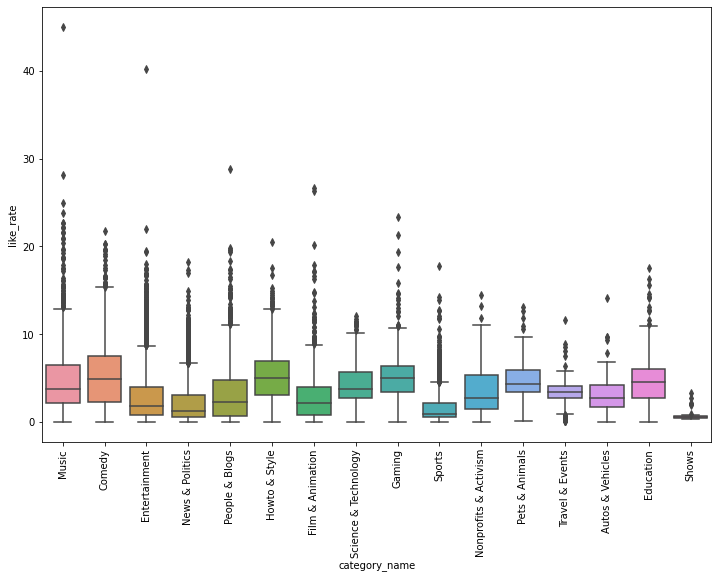

In [58]:
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name',y='like_rate',data=df)
plt.xticks(rotation=90)
plt.show()

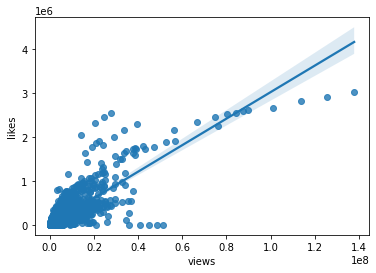

In [59]:
sns.regplot(x='views',y='likes',data=df)
plt.show()

In [60]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

In [61]:
corr=df[['views', 'likes', 'dislikes', 'comment_count']].corr()
corr

,views,likes,dislikes,comment_count
views,1.000000,0.838562,0.605889,0.712010
likes,0.838562,1.000000,0.506074,0.805024
dislikes,0.605889,0.506074,1.000000,0.757043
comment_count,0.712010,0.805024,0.757043,1.000000


<AxesSubplot:>

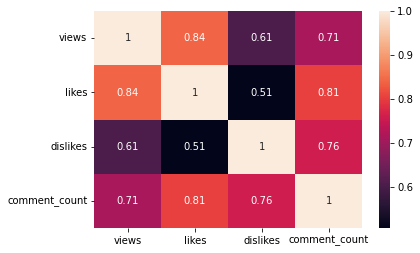

In [63]:
sns.heatmap(corr,annot=True)

#### which channels have largest number  of trending videos?

In [62]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,4.575843,0.167292,0.256342
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,6.309630,0.094903,0.835851
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,4.874563,0.062887,0.253752


In [64]:
df['channel_title'].value_counts()

The Young Turks    97
FBE                93
VikatanTV          92
REACT              88
MSNBC              88
                   ..
Mustapha            1
LNT                 1
Qing Pan            1
LTV Ethiopia        1
Taz Network         1
Name: channel_title, Length: 3211, dtype: int64

In [65]:
ch_df=df.groupby('channel_title').size().sort_values(ascending=False).reset_index().rename(columns={0:'total_videos'})
ch_df

,channel_title,total_videos
0,The Young Turks,97
1,FBE,93
2,VikatanTV,92
3,MSNBC,88
4,REACT,88
...,...,...
3206,ShowShootersTV,1
3207,Show NBA,1
3208,Shoe0nHead,1
3209,ShiinYu69,1


In [66]:
ch_df_top20=ch_df.head(20)

In [67]:
ch_df_top20

,channel_title,total_videos
0,The Young Turks,97
1,FBE,93
2,VikatanTV,92
3,MSNBC,88
4,REACT,88
5,SET India,88
6,ARY Digital,86
7,The Late Show with Stephen Colbert,85
8,MLG Highlights,83
9,RadaanMedia,82


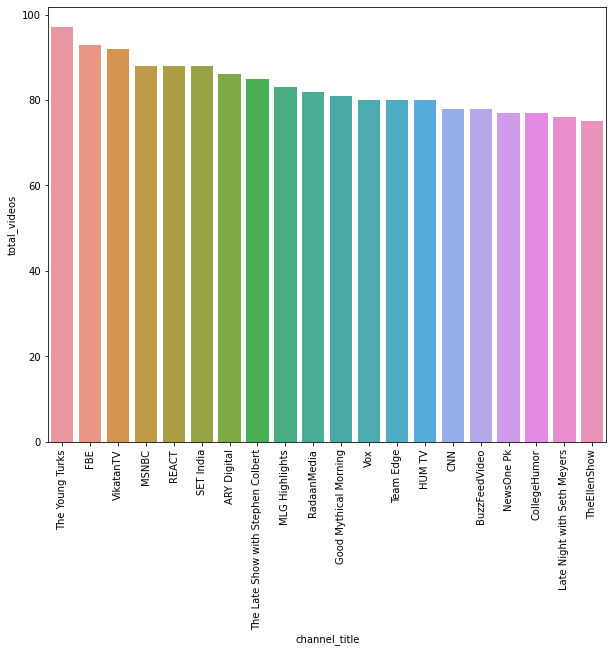

In [68]:
plt.figure(figsize=(10,8))
sns.barplot(x='channel_title',y='total_videos',data=ch_df_top20)
plt.xticks(rotation=90)
plt.show()

#### Does punctuations in title and tags have any relations with views,likes,dislikes?

In [69]:
df[['title','tags']]

,title,tags
0,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In..."
1,PLUSH - Bad Unboxing Fan Mail,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id..."
2,"Racist Superman | Rudy Mancuso, King Bach & Le...","racist superman|""rudy""|""mancuso""|""king""|""bach""..."
3,I Dare You: GOING BALD!?,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""..."
4,Ed Sheeran - Perfect (Official Music Video),"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove..."
...,...,...
19995,"Priyamanaval Episode 947, 23/02/18","priyamanaval episode 947|""Priyamanaval 23.02.2..."
19996,Can You Get Through These Mind Tricks?,"reaction time|""reaction""|""time""|""reactiontime""..."
19997,Harry Potter except it's written by an AI,"soothouse|""soot""|""house""|""harry""|""potter""|""AI""..."
19998,Drake - God's Plan (Lyrics) ð¤ (Original Mix),"drake gods plan|""drake gods plan lyrics""|""gods..."


In [71]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [72]:
df['count_punc']=df['title'].apply(lambda x: len([char for char in x if char in string.punctuation]))

In [74]:
df['count_punc']

0        4
1        1
2        3
3        3
4        3
        ..
19995    3
19996    1
19997    1
19998    6
19999    0
Name: count_punc, Length: 20000, dtype: int64

<AxesSubplot:xlabel='count_punc', ylabel='views'>

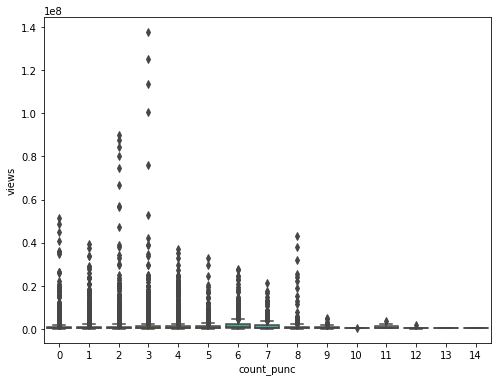

In [75]:
plt.figure(figsize=(8,6))
sns.boxplot(x='count_punc',y='views',data=df)

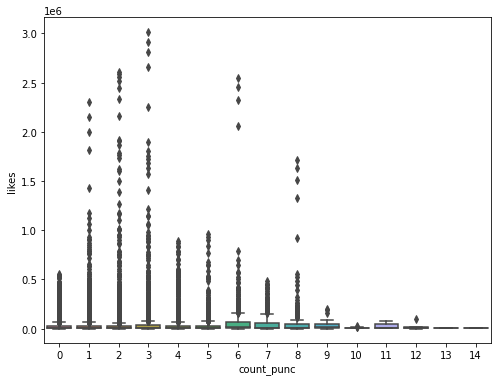

In [76]:
plt.figure(figsize=(8,6))
sns.boxplot(x="count_punc",y='likes',data=df)
plt.show()

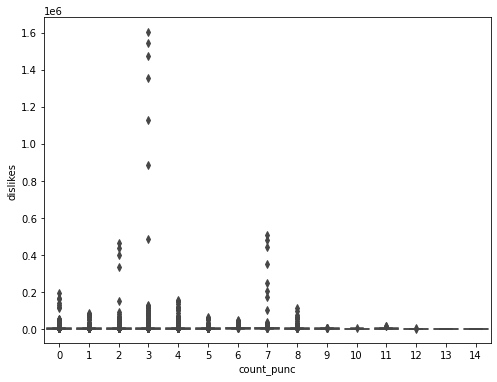

In [77]:
plt.figure(figsize=(8,6))
sns.boxplot(x='count_punc',y='dislikes',data=df)
plt.show()